In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import contractions
import nltk

In [ ]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')#('New_Delhi_reviews.csv')
data.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [ ]:
data.describe()

Rating
count  20491.000000
mean       3.952223
std        1.233030
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


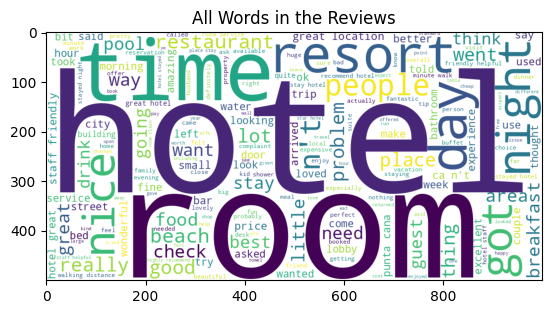

In [ ]:
all_words = ' '.join(data['Review'])

# Создание облака слов
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.title('All Words in the Reviews')
plt.show()

<Axes: ylabel='Rating'>

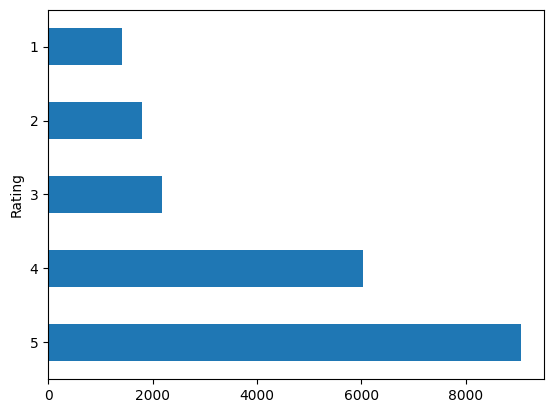

In [ ]:
data.Rating.value_counts().sort_index(ascending=False).plot(kind='barh')

# Распределение длин комметариев

<Axes: ylabel='Frequency'>

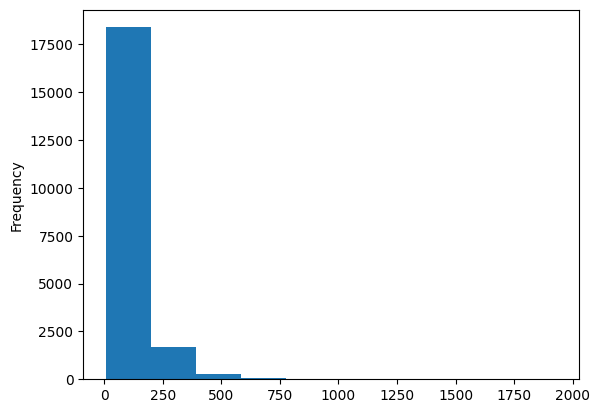

In [ ]:
data['ReviewLength'] = data.Review.str.split().apply(len)
data['ReviewLength'].plot.hist()

In [ ]:
print('Min review length = {}, max review legth = {}'.format(data['ReviewLength'].min(), data['ReviewLength'].max()))

Min review length = 7, max review legth = 1931


In [ ]:
data.loc[data['ReviewLength']==7, 'Review']

1501    loved resort amazing space lot, not bored,  
Name: Review, dtype: object

In [ ]:
data.loc[data['ReviewLength']==1931, 'Review'].values[0]

"honest review visit 5/21-5/28 let begin saying heard secrets couple work went resort year returned raving experiences, all-inclusive regular cruise traveler past 4 years decided based word-of-mouth secrets place try.i read posts site daily, review written resort scoured eyes, reviews gotten good suspected staff secrets writing, fact person posted review claimed saw staff members reading posting forum, ca n't say stay excellence club saw type activity going wo n't past hotel ratings high posting positive reviews.in case read totally honest review secrets felt all-inclusive experience, end review include link photo page think enjoy.i booked trip judy maria travel internet, no travel agent travel site pop did search booking resort, went site saw photos judy maria resort chumming general manager, felt dealing travel agents knew resort took chance booking, great gamble, maria gave great price suggested perfect room location took travel worries hands, admit nervous n't room wanted helicopte

<Axes: title={'center': 'ReviewLength'}, xlabel='[Rating]'>

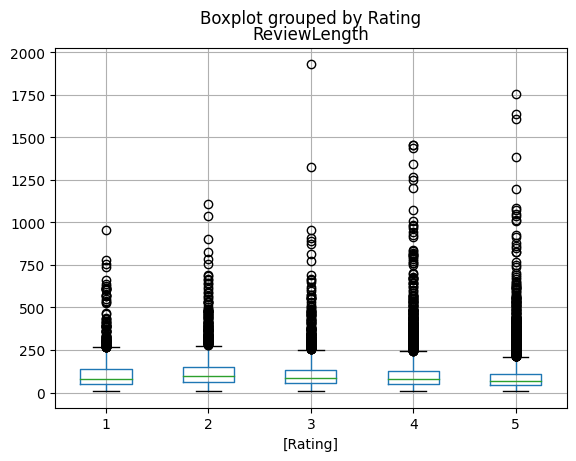

In [ ]:
data[['Rating','ReviewLength']].boxplot(by='Rating')

# Почистим данные от ссылок, тэгов, эмодзи

In [ ]:
def data_clean(text):
    text = str(text)
    text = text.lower()
    text = re.sub('  ', " ", text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r"https?:\S*", "", text)
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'#\S*', '', text)
    return text
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def remove_contraction(text):
    return contractions.fix(text)


In [ ]:
data['clean'] = data.Review.apply(data_clean).apply(strip_html_tags).apply(remove_emoji).apply(remove_contraction)

In [ ]:
data.head()

Review  Rating  ReviewLength  \
0  nice hotel expensive parking got good deal sta...       4            87   
1  ok nothing special charge diamond member hilto...       2           250   
2  nice rooms not 4* experience hotel monaco seat...       3           217   
3  unique, great stay, wonderful time hotel monac...       5            89   
4  great stay great stay, went seahawk game aweso...       5           191   

                                               clean  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms not  experience hotel monaco seattl...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...

# Удалим стоп слова

In [ ]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
stop_words = stop_words + ["n't", "nt"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stopwords(text):
    text = nltk.tokenize.word_tokenize(text)
    filtered_sentence = []

    for w in text:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
remove_stopwords("I'm in love")

['I', "'m", 'love']

In [ ]:
data['Cleaned'] = data['clean'].apply(remove_stopwords)

In [ ]:
data.head()

Review  Rating  ReviewLength  \
0  nice hotel expensive parking got good deal sta...       4            87   
1  ok nothing special charge diamond member hilto...       2           250   
2  nice rooms not 4* experience hotel monaco seat...       3           217   
3  unique, great stay, wonderful time hotel monac...       5            89   
4  great stay great stay, went seahawk game aweso...       5           191   

                                               clean  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not  experience hotel monaco seattl...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             Cleaned  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, rooms, experience, hotel, monaco, seatt...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

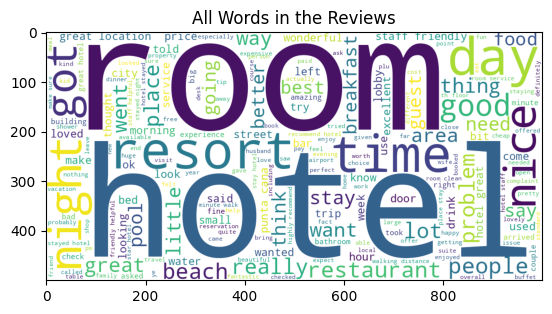

In [ ]:
all_words = ' '.join([' '.join(words) for words in data['Cleaned']])

# Создание облака слов
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_words)
plt.imshow(wordcloud)
plt.title('All Words in the Reviews')
plt.show()

# Нормализуем слова

In [ ]:
from nltk.stem import WordNetLemmatizer


def lemmatize(text):
    lemmatizer = WordNetLemmatizer()

    fil_tokens_lemma = [lemmatizer.lemmatize(token) for token in text]

    return fil_tokens_lemma

In [ ]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('has')

[nltk_data] Downloading package wordnet to /root/nltk_data...


'ha'

In [ ]:
data['lemantized'] = data['Cleaned'].apply(lemmatize)

In [ ]:
data.head()

Review  Rating  ReviewLength  \
0  nice hotel expensive parking got good deal sta...       4            87   
1  ok nothing special charge diamond member hilto...       2           250   
2  nice rooms not 4* experience hotel monaco seat...       3           217   
3  unique, great stay, wonderful time hotel monac...       5            89   
4  great stay great stay, went seahawk game aweso...       5           191   

                                               clean  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not  experience hotel monaco seattl...   
3  unique great stay wonderful time hotel monaco ...   
4  great stay great stay went seahawk game awesom...   

                                             Cleaned  \
0  [nice, hotel, expensive, parking, got, good, d...   
1  [ok, nothing, special, charge, diamond, member...   
2  [nice, rooms, experience, hotel, monaco, seatt...   
3  [unique, great, stay, wonderful, time, hotel, ...   
4  [great, stay, great, stay, went, seahawk, game...   

                                          lemantized  
0  [nice, hotel, expensive, parking, got, good, d...  
1  [ok, nothing, special, charge, diamond, member...  
2  [nice, room, experience, hotel, monaco, seattl...  
3  [unique, great, stay, wonderful, time, hotel, ...  
4  [great, stay, great, stay, went, seahawk, game...

# Выделим отзывы с самым высоким и с самым низким рейтингом

In [ ]:
 data_1 = data[data['Rating']==1]
 data_5 = data[data['Rating']==5]

# Добавим биграммы

In [ ]:
from gensim.models import *
from gensim.models.phrases import Phraser
from gensim import corpora

# Предполагается, что data['lemantized'] и data['Cleaned'] - список списков токенов.
def create_bigrams(data):
  # Создание фраз для биграмм
  print('Creating bigrams...')
  bigram = Phrases(data['lemantized'], min_count=5, threshold=100)  # Параметры можно настроить
  bigram_mod = Phraser(bigram)

  # Применение модели биграмм к корпусу текстов
  data_bigrammed = [bigram_mod[doc] for doc in data['lemantized']]

  # Создание словаря, включающего униграммы и биграммы
  print('Making dictionary...')
  dictionary = corpora.Dictionary(data_bigrammed)
  print('Original: {}'.format(dictionary))

  # Фильтрация словаря
  dictionary.filter_extremes(no_below=5, no_above=0.9, keep_n=None)
  dictionary.save('trip_advisor.dict')
  print('Filtered: {}'.format(dictionary))

  # Векторизация корпуса с униграммами и биграммами
  print('Vectorizing corpus...')
  corpus = [dictionary.doc2bow(bigram_mod[doc]) for doc in data['lemantized']]
  corpora.MmCorpus.serialize('trip_advisor.model', corpus)

  print('Unigrams and bigrams added and corpus vectorized successfully.')
  return corpus, dictionary

In [ ]:
corpus, dictionary = create_bigrams(data)
corpus_1, dictionary_1 = create_bigrams(data_1)
corpus_5, dictionary_5 = create_bigrams(data_5)

Creating bigrams...
Making dictionary...
Original: Dictionary<72727 unique tokens: ['advantage', 'advice', 'anniversary', 'arrived', 'aveda_bath']...>
Filtered: Dictionary<14325 unique tokens: ['advantage', 'advice', 'anniversary', 'arrived', 'aveda_bath']...>
Vectorizing corpus...
Unigrams and bigrams added and corpus vectorized successfully.
Creating bigrams...
Making dictionary...
Original: Dictionary<14356 unique tokens: ['adding', 'aggravated', 'answered', 'anybody', 'apologizing']...>
Filtered: Dictionary<3138 unique tokens: ['answered', 'anybody', 'apologizing', 'apparently', 'appealing']...>
Vectorizing corpus...
Unigrams and bigrams added and corpus vectorized successfully.
Creating bigrams...
Making dictionary...
Original: Dictionary<40233 unique tokens: ['animal', 'area', 'bathrobe', 'big', 'brandi']...>
Filtered: Dictionary<8334 unique tokens: ['animal', 'area', 'bathrobe', 'big', 'chain']...>
Vectorizing corpus...
Unigrams and bigrams added and corpus vectorized successful

# LSI

In [ ]:
print("Training model...")

%time lsi = lsimodel.LsiModel(corpus, id2word=dictionary, num_topics=5, chunksize=50)

Training model...
CPU times: user 8min 32s, sys: 24.4 s, total: 8min 56s
Wall time: 5min 30s


In [ ]:
lsi.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('hotel', 0.46591133341605934),
   ('room', 0.4616429767545391),
   ('great', 0.18063224188958632),
   ('good', 0.17024701726920857),
   ('day', 0.154561324945663),
   ('time', 0.14260504557091336),
   ('night', 0.13990812377198356),
   ('beach', 0.1380961808235894),
   ('staff', 0.1343459788980681),
   ('stay', 0.1216073036770826)]),
 (1,
  [('hotel', -0.627213975596042),
   ('resort', 0.3358069823459159),
   ('beach', 0.3002604808007747),
   ('pool', 0.17771691709086837),
   ('food', 0.17238857039920277),
   ('day', 0.1539030553729772),
   ('time', 0.1335613585050622),
   ('people', 0.12889304195508003),
   ('room', -0.1068097039429539),
   ('location', -0.10562332377115818)]),
 (2,
  [('room', -0.7840376051731572),
   ('hotel', 0.44684009393413904),
   ('great', 0.15910434887506353),
   ('beach', 0.1589938042091412),
   ('restaurant', 0.09214187301339317),
   ('food', 0.08803703692280035),
   ('bed', -0.08160315065401147),
   ('pool', 0.08153853450888324),
   ('good', 0.0768

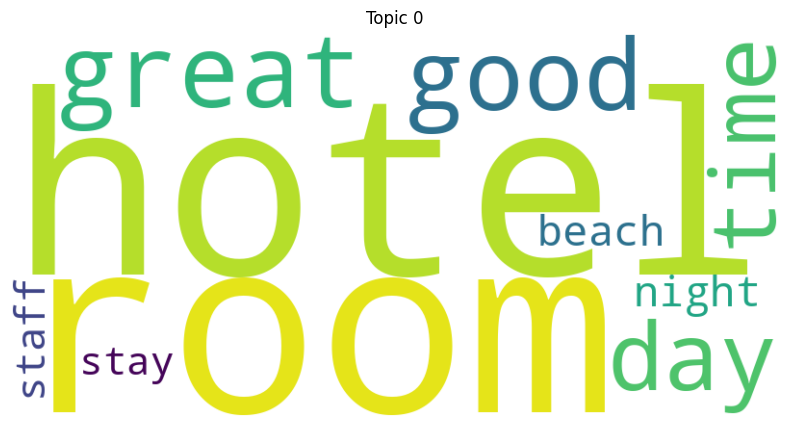

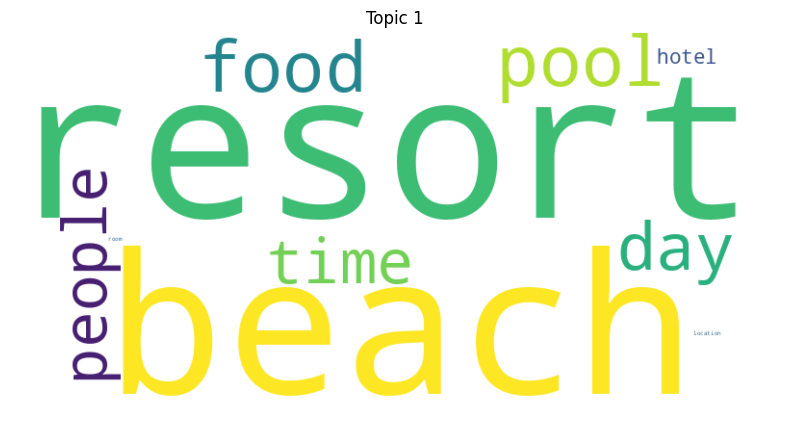

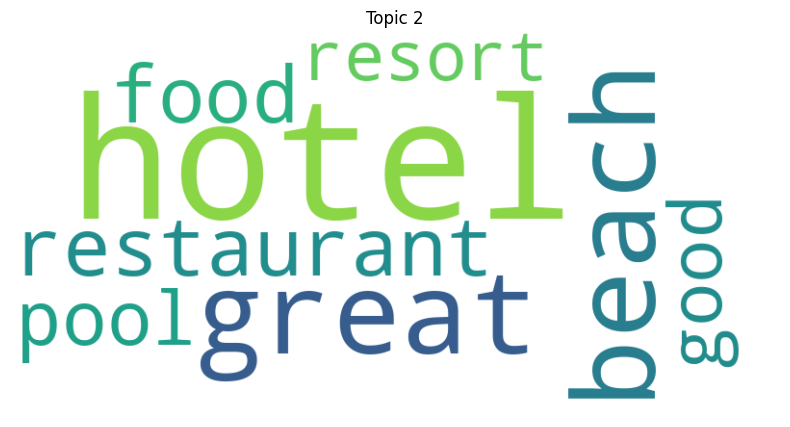

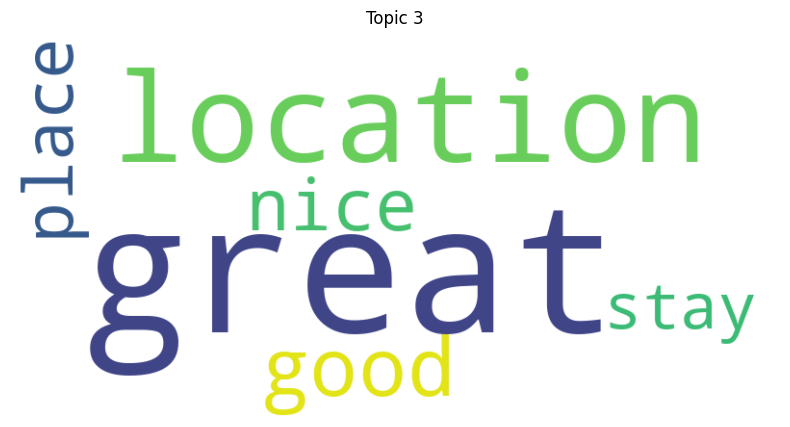

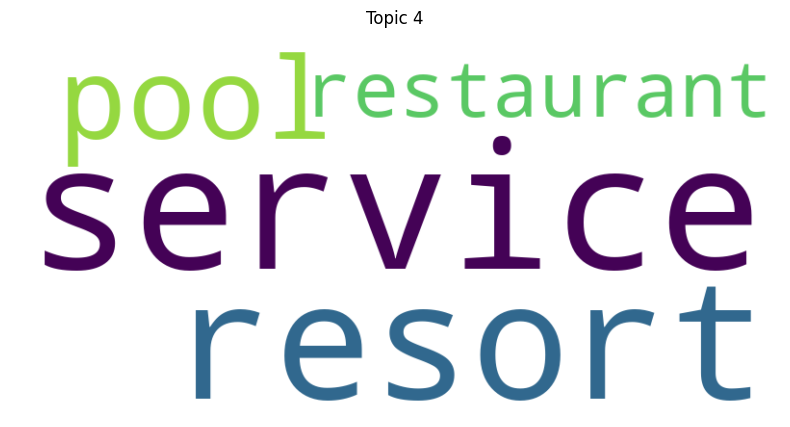

In [ ]:
topics = lsi.show_topics(num_topics=5, formatted=False)

# Функция для создания облака слов
def draw_wordcloud(topic_num, topics):
    topic = topics[topic_num]
    topic_words = dict(topic[1])
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()

# Визуализация облаков слов для каждого топика
for i in range(5):
    draw_wordcloud(i, topics)

## Для отзывов с низким рейтингом

In [ ]:
lsi_1 = lsimodel.LsiModel(corpus_1, id2word=dictionary_1, num_topics=5, chunksize=50)
lsi_1.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('room', 0.5690071298898168),
   ('hotel', 0.4961520738789942),
   ('day', 0.17572885983403394),
   ('night', 0.14225596699555523),
   ('stay', 0.13634494426876897),
   ('time', 0.1265357387176628),
   ('service', 0.11932346355031022),
   ('told', 0.11920546721269693),
   ('staff', 0.11649773226044818),
   ('resort', 0.09956795487402618)]),
 (1,
  [('hotel', -0.7021345580722878),
   ('resort', 0.34782318260074535),
   ('day', 0.20739641805721445),
   ('food', 0.16331225391576154),
   ('beach', 0.15598765267357356),
   ('restaurant', 0.14121093814342084),
   ('service', 0.11697401499138013),
   ('told', 0.11338664098494551),
   ('went', 0.1103338031253504),
   ('time', 0.10302707029127665)]),
 (2,
  [('room', 0.7064576946787756),
   ('hotel', -0.3558515965507629),
   ('resort', -0.25348758523778653),
   ('beach', -0.1723101114593453),
   ('restaurant', -0.15409327056828576),
   ('food', -0.14890225259654485),
   ('pool', -0.12522651659951262),
   ('day', -0.11461533939620695),
 

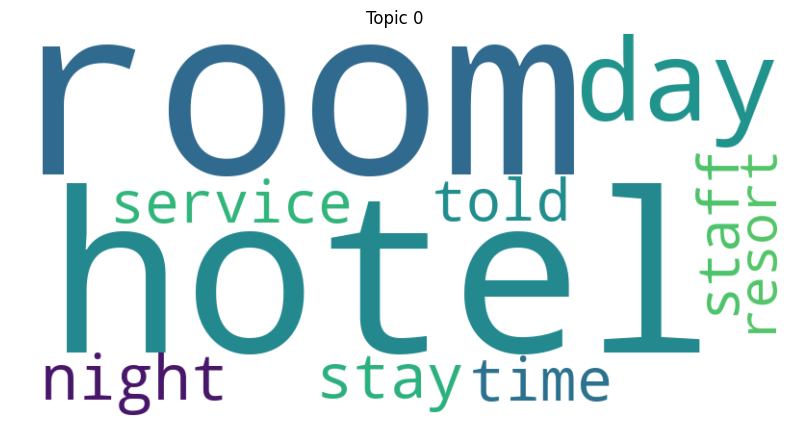

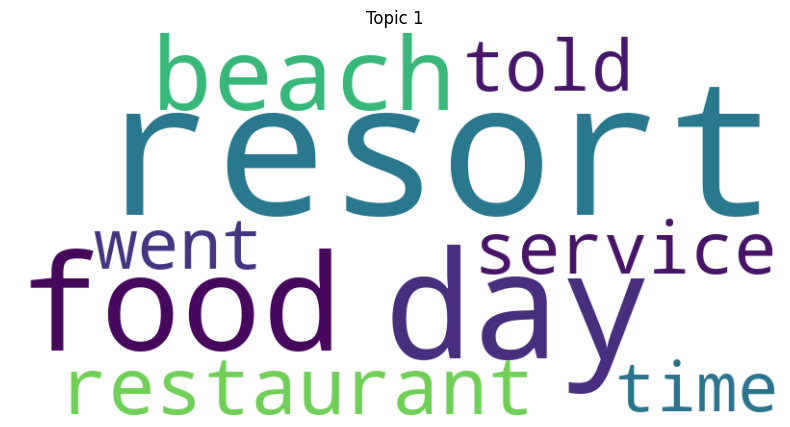

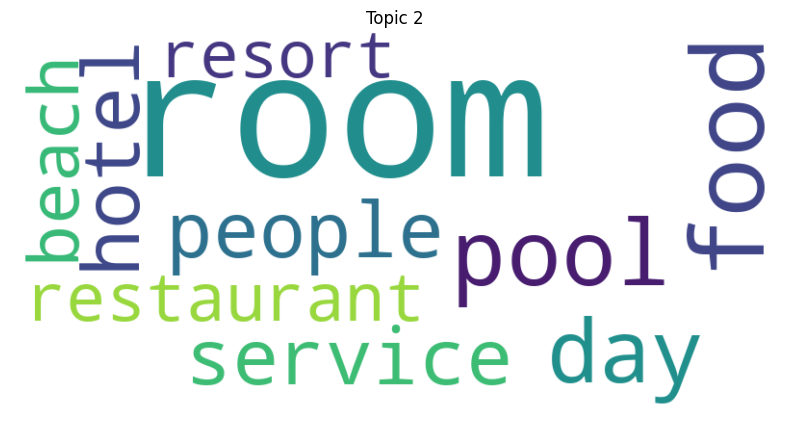

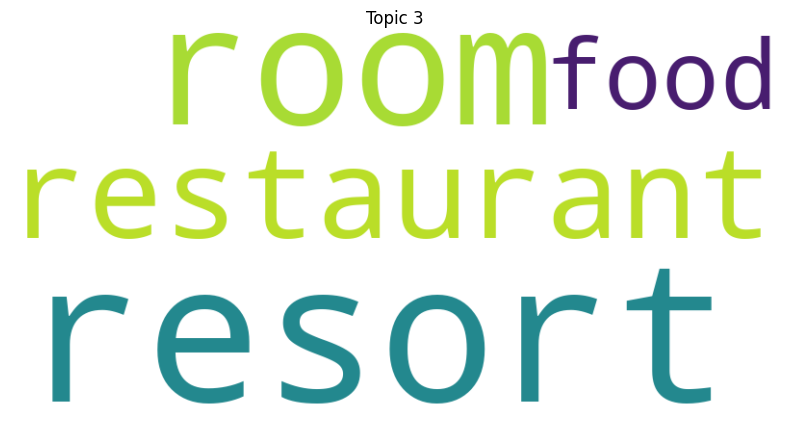

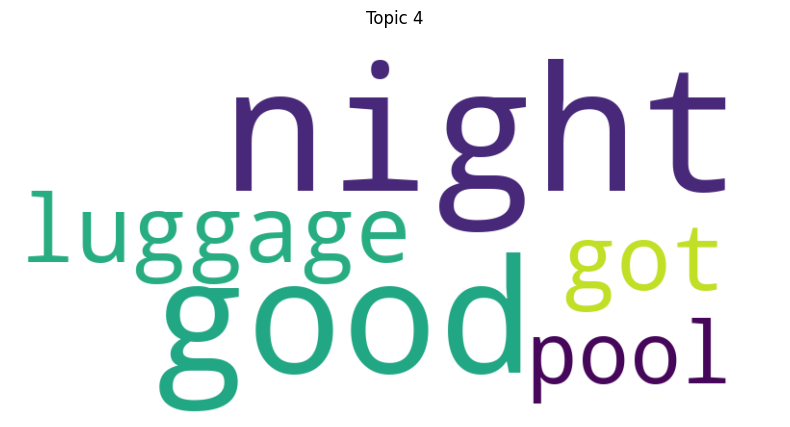

In [ ]:
topics_1 = lsi_1.show_topics(num_topics=5, formatted=False)
for i in range(5):
    draw_wordcloud(i, topics_1)

## Для отзывов с высоким рейтингом

In [ ]:
lsi_5 = lsimodel.LsiModel(corpus_5, id2word=dictionary_5, num_topics=5, chunksize=50)
lsi_5.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('hotel', 0.5291309161461749),
   ('room', 0.4058064993721912),
   ('great', 0.2265359707056601),
   ('staff', 0.15789251214181257),
   ('good', 0.1462779483141628),
   ('day', 0.13907301666159744),
   ('time', 0.13731385523946252),
   ('stay', 0.13391889861847628),
   ('night', 0.13007599188186375),
   ('beach', 0.11927456901501315)]),
 (1,
  [('hotel', -0.6109528104567389),
   ('beach', 0.3097555484175202),
   ('resort', 0.30292437863078453),
   ('pool', 0.21096818635584905),
   ('day', 0.15879918727335407),
   ('time', 0.151639360310724),
   ('food', 0.147917968769655),
   ('people', 0.13678548439631996),
   ('drink', 0.10395377472548074),
   ('good', 0.10355998172476294)]),
 (2,
  [('room', 0.7722291450508255),
   ('hotel', -0.4505848227712055),
   ('beach', -0.17539874962094293),
   ('bed', 0.09685304932425372),
   ('resort', -0.09117987997582874),
   ('food', -0.0881298322152047),
   ('restaurant', -0.07666318099699297),
   ('view', 0.07310224693433862),
   ('floor', 0.07

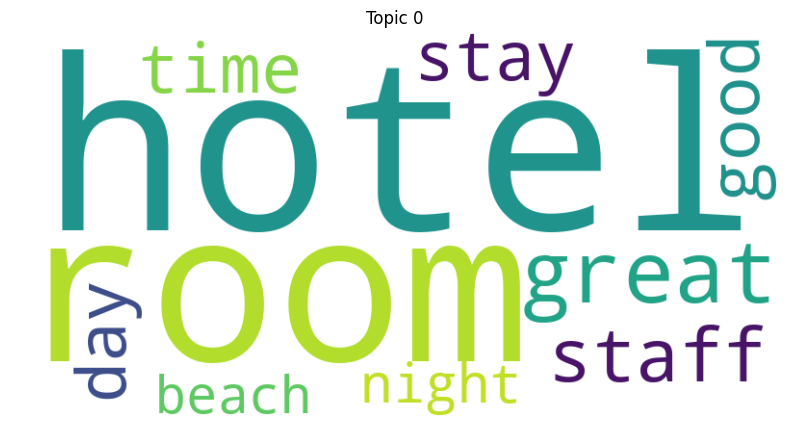

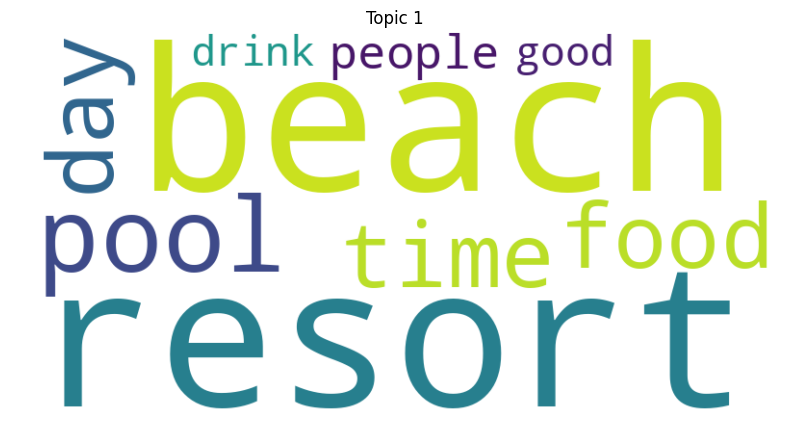

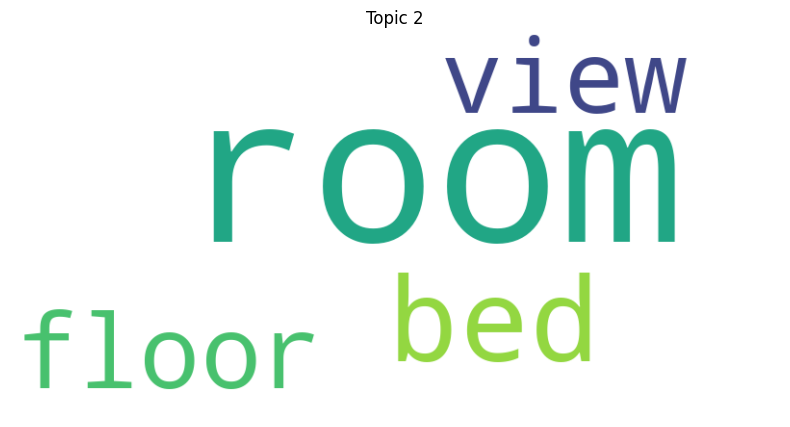

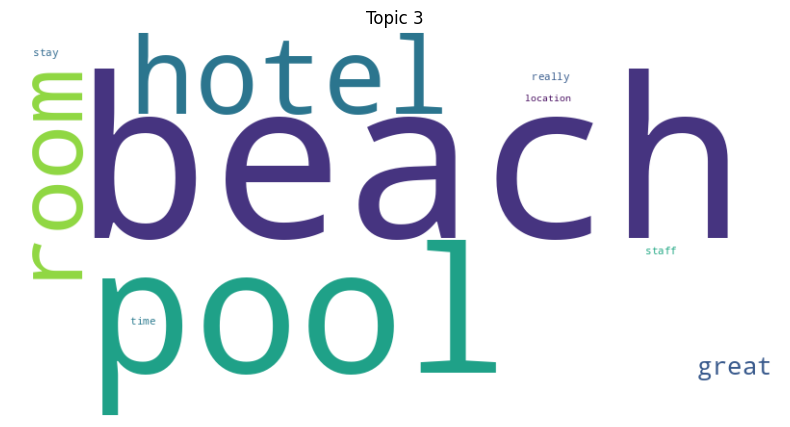

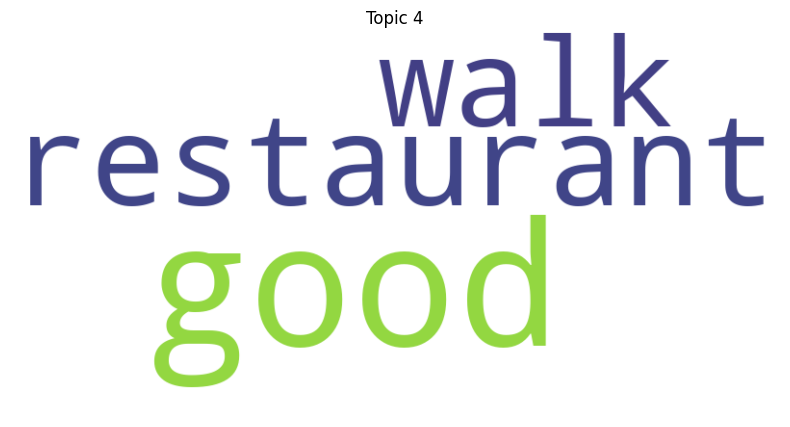

In [ ]:
topics_5 = lsi_5.show_topics(num_topics=5, formatted=False)
for i in range(5):
    draw_wordcloud(i, topics_5)

# LDA

In [ ]:
print("Training model...")

%time lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=5, chunksize=50, update_every=1, passes=2)

Training model...
CPU times: user 28 s, sys: 139 ms, total: 28.1 s
Wall time: 28.3 s


In [ ]:
lda.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('room', 0.044293247),
   ('hotel', 0.013689254),
   ('day', 0.012144204),
   ('night', 0.011861662),
   ('got', 0.008714358),
   ('time', 0.008325398),
   ('problem', 0.007196384),
   ('desk', 0.0068682125),
   ('told', 0.0068323654),
   ('hour', 0.006381724)]),
 (1,
  [('beach', 0.026874775),
   ('resort', 0.022542847),
   ('food', 0.021617724),
   ('pool', 0.021272002),
   ('great', 0.01789985),
   ('restaurant', 0.01529044),
   ('day', 0.014392709),
   ('good', 0.012951897),
   ('time', 0.012822591),
   ('bar', 0.011598137)]),
 (2,
  [('hotel', 0.08240109),
   ('room', 0.03422302),
   ('great', 0.02701958),
   ('location', 0.02311845),
   ('good', 0.018755356),
   ('clean', 0.014251946),
   ('staff', 0.014225692),
   ('nice', 0.014196629),
   ('breakfast', 0.014043368),
   ('stay', 0.013627989)]),
 (3,
  [('hotel', 0.016792865),
   ('like', 0.013235114),
   ('place', 0.011464964),
   ('good', 0.011461453),
   ('review', 0.010869986),
   ('room', 0.010512631),
   ('better', 

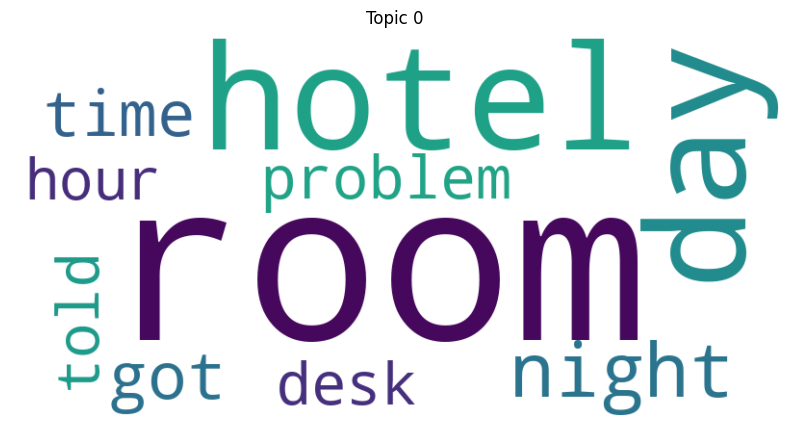

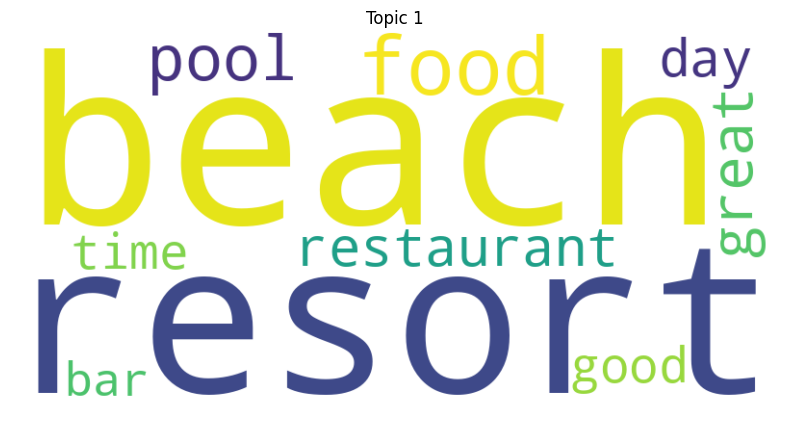

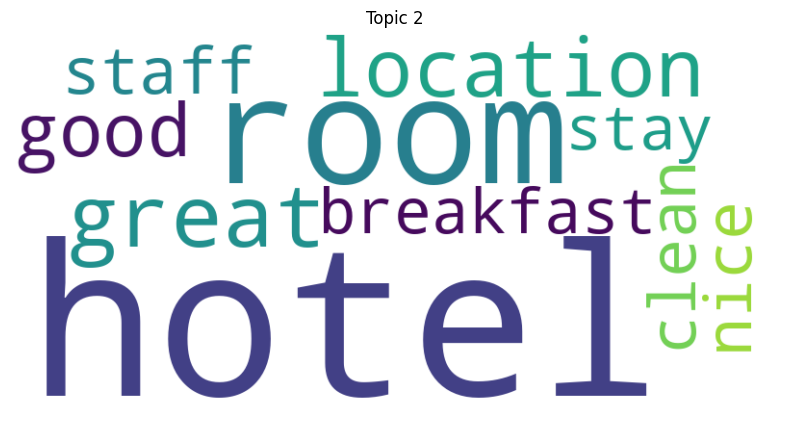

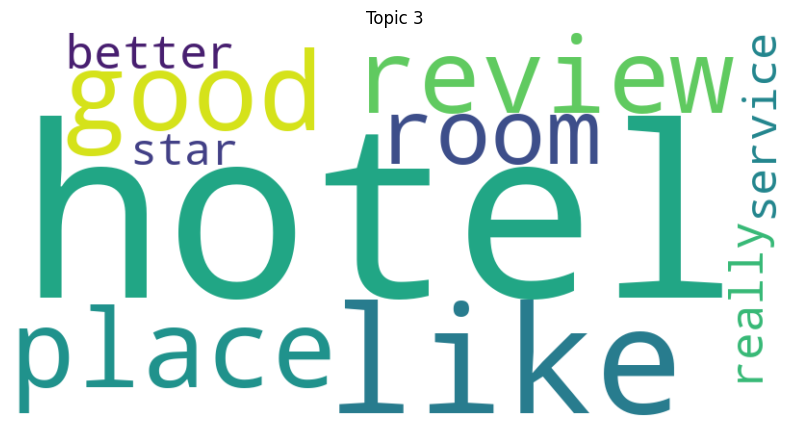

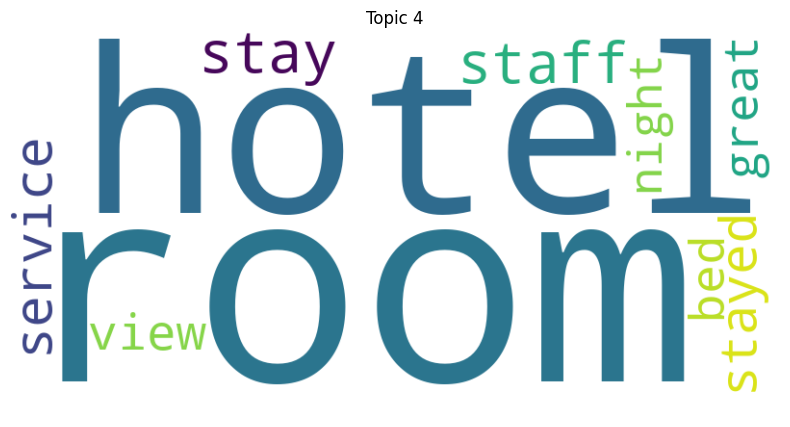

In [ ]:
topics = lda.show_topics(num_topics=5, formatted=False)

for i in range(5):
    draw_wordcloud(i, topics)

## Для отзывов с низким рейтингом

In [ ]:
lda_1 = ldamodel.LdaModel(corpus_1, id2word=dictionary_1, num_topics=5, chunksize=50, update_every=1, passes=2)
lda_1.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('hotel', 0.027809074),
   ('day', 0.0219007),
   ('told', 0.021395452),
   ('room', 0.018058702),
   ('said', 0.014810829),
   ('time', 0.010394995),
   ('reservation', 0.00985814),
   ('called', 0.009468561),
   ('stay', 0.0092784595),
   ('night', 0.009277936)]),
 (1,
  [('hotel', 0.045870725),
   ('room', 0.03339257),
   ('staff', 0.021924336),
   ('service', 0.021605462),
   ('resort', 0.017484397),
   ('stay', 0.01193772),
   ('guest', 0.011633928),
   ('stayed', 0.007439076),
   ('desk', 0.0073630568),
   ('time', 0.007177543)]),
 (2,
  [('pool', 0.016289296),
   ('people', 0.015169621),
   ('place', 0.014517534),
   ('food', 0.01321748),
   ('day', 0.01293343),
   ('time', 0.01196927),
   ('room', 0.011686886),
   ('got', 0.0115997195),
   ('like', 0.01098496),
   ('beach', 0.010172556)]),
 (3,
  [('restaurant', 0.018292747),
   ('good', 0.013480186),
   ('really', 0.013163044),
   ('food', 0.011804097),
   ('beach', 0.010650014),
   ('beautiful', 0.01047953),
   ('drin

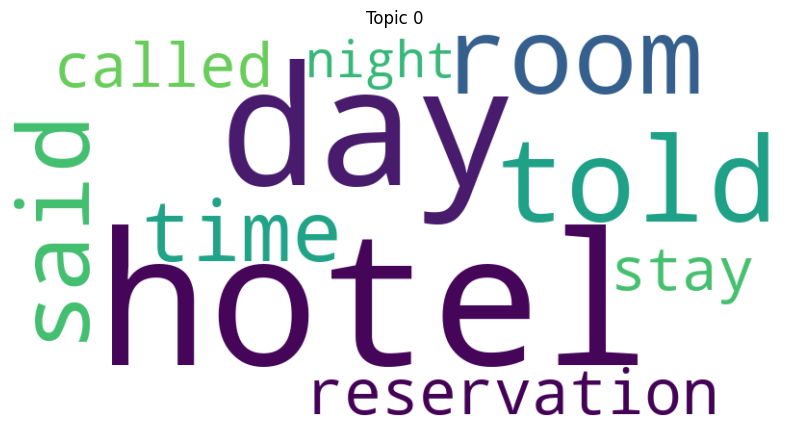

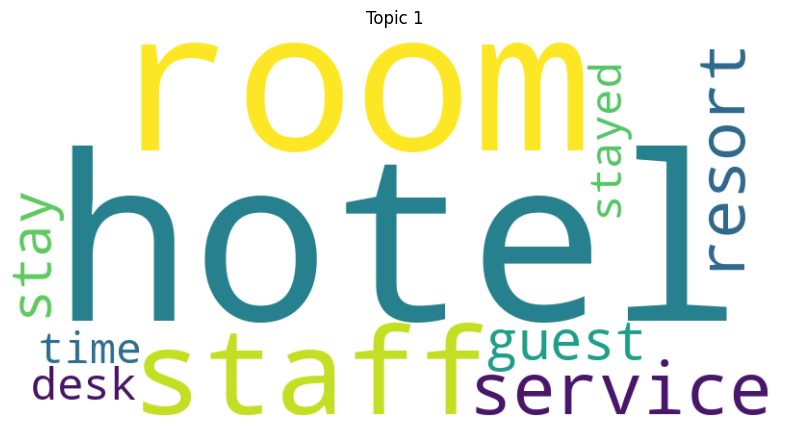

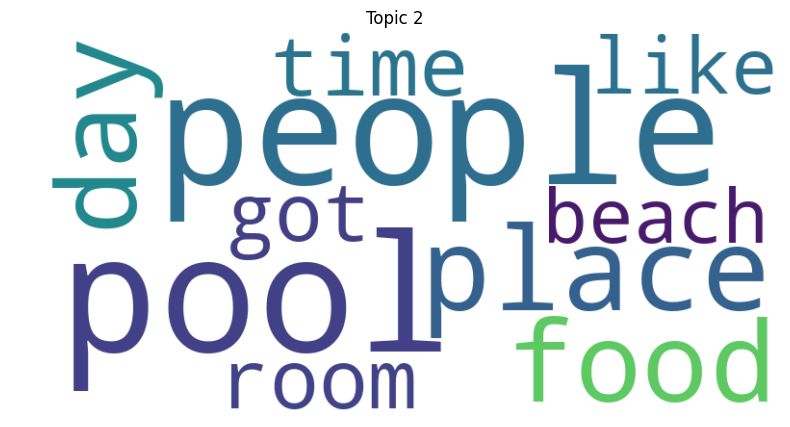

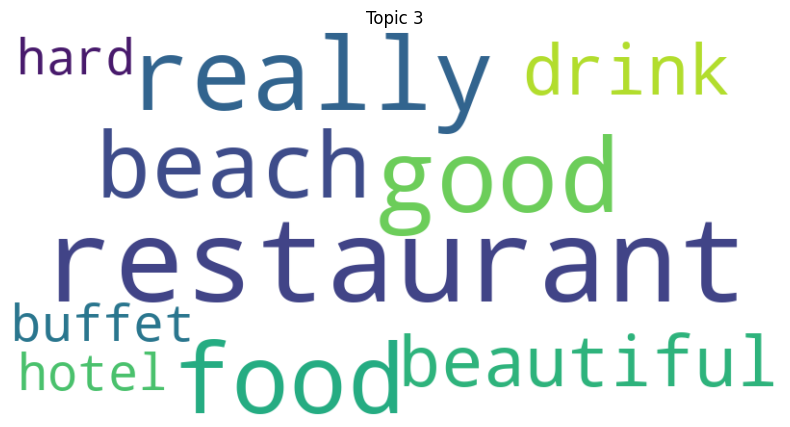

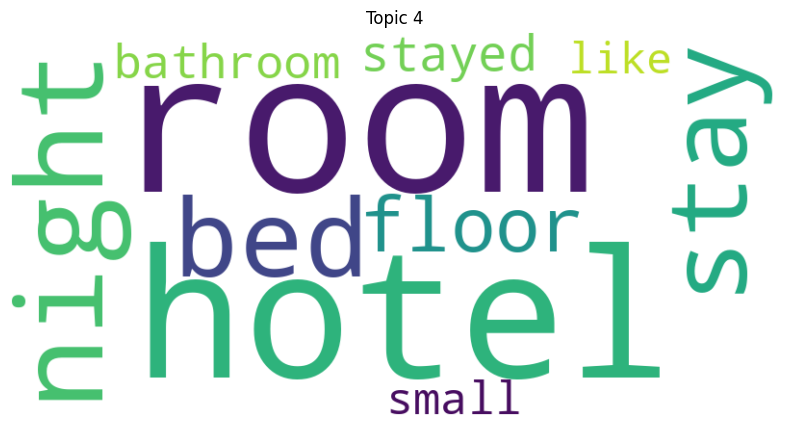

In [ ]:
topics_1 = lda_1.show_topics(num_topics=5, formatted=False)

for i in range(5):
    draw_wordcloud(i, topics_1)

## Для отзывов с высоким рейтингом

In [ ]:
lda_5 = ldamodel.LdaModel(corpus_5, id2word=dictionary_5, num_topics=5, chunksize=50, update_every=1, passes=2)
lda_5.show_topics(num_topics=5, num_words=10, formatted=False)

[(0,
  [('hotel', 0.07404055),
   ('room', 0.028258927),
   ('great', 0.027039055),
   ('location', 0.017661989),
   ('stay', 0.017630015),
   ('good', 0.0144468015),
   ('staff', 0.01443148),
   ('breakfast', 0.014018271),
   ('night', 0.011038259),
   ('walk', 0.010863398)]),
 (1,
  [('pool', 0.023622118),
   ('beach', 0.022907414),
   ('resort', 0.017141644),
   ('food', 0.015429301),
   ('good', 0.015247624),
   ('great', 0.013824542),
   ('day', 0.012710202),
   ('people', 0.012498759),
   ('drink', 0.010933917),
   ('restaurant', 0.010594732)]),
 (2,
  [('room', 0.054810908),
   ('bed', 0.022730993),
   ('floor', 0.012831901),
   ('bathroom', 0.012712628),
   ('shower', 0.01139992),
   ('view', 0.011082256),
   ('large', 0.009377258),
   ('night', 0.0085560735),
   ('free', 0.008101574),
   ('rate', 0.007460803)]),
 (3,
  [('staff', 0.025585588),
   ('hotel', 0.023211932),
   ('best', 0.019562412),
   ('place', 0.017071517),
   ('great', 0.016673084),
   ('stay', 0.015674453),
  

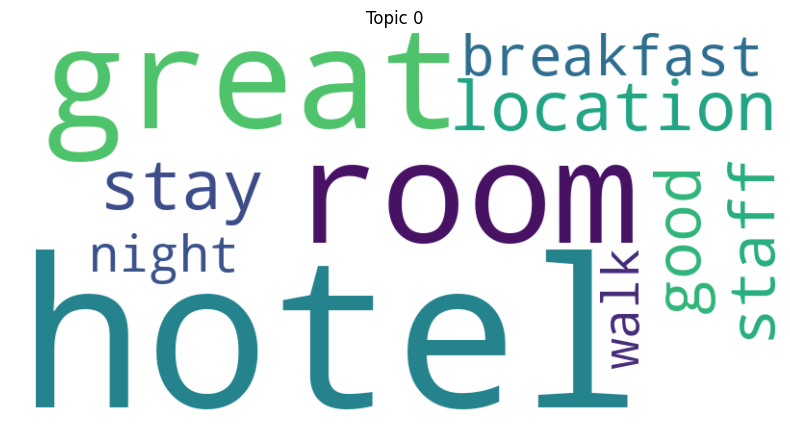

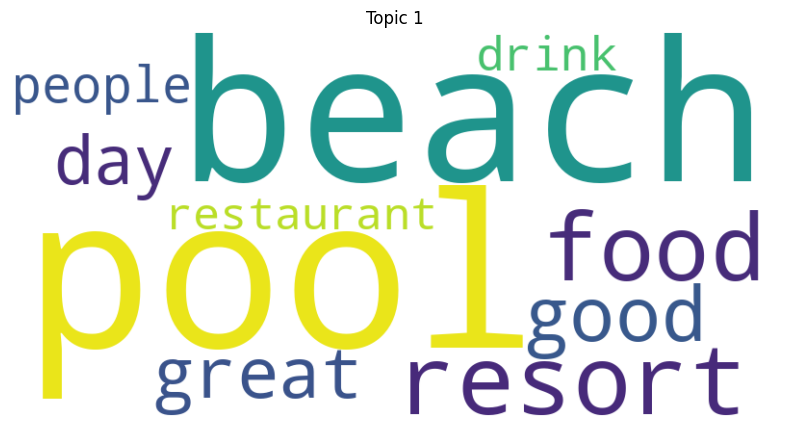

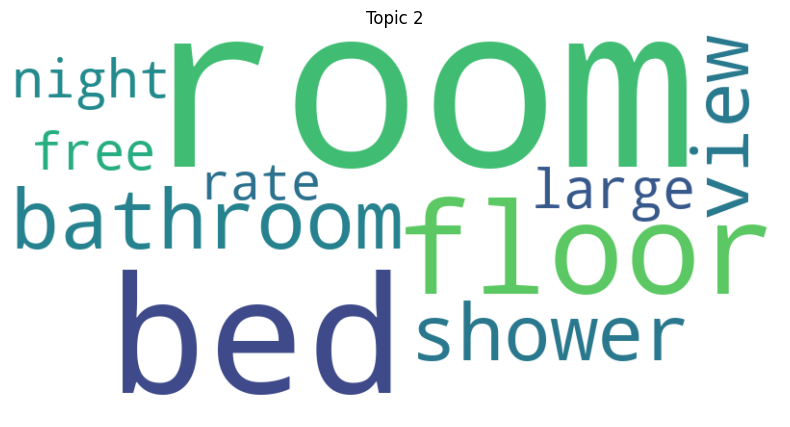

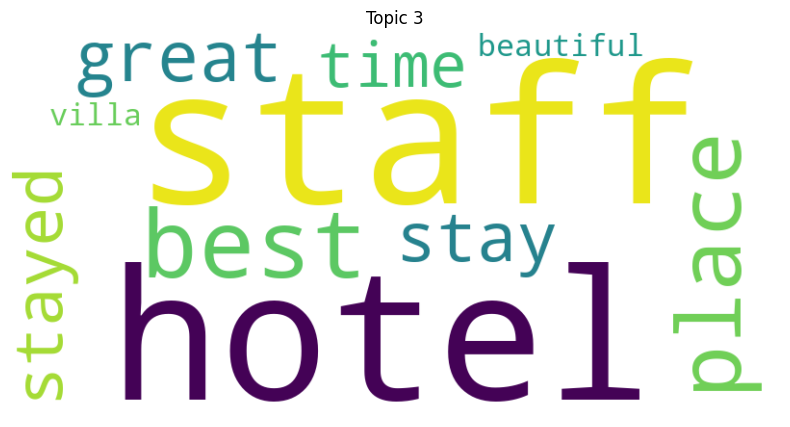

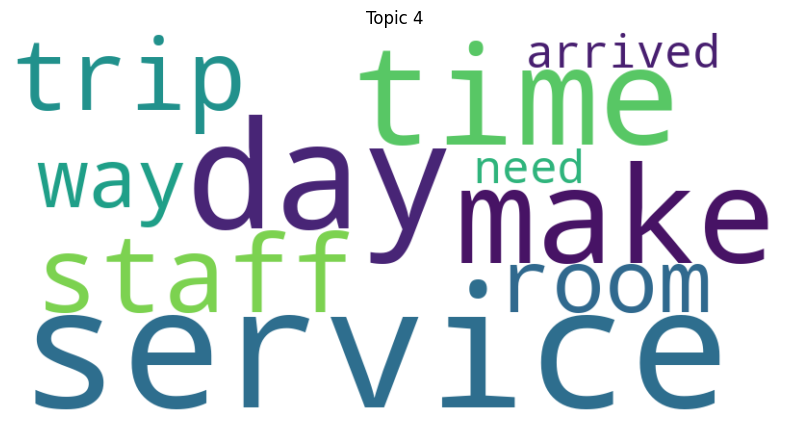

In [ ]:
topics_5 = lda_5.show_topics(num_topics=5, formatted=False)

for i in range(5):
    draw_wordcloud(i, topics_5)

# BERTopic

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00


In [81]:
%%time
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
# для удаления стоп-слов
vectorizer_model = CountVectorizer(stop_words="english")
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, vectorizer_model=vectorizer_model)
headline_topics, _ = model.fit_transform(data.clean)

2024-08-31 15:19:40,818 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/641 [00:00<?, ?it/s]

2024-08-31 15:28:52,936 - BERTopic - Embedding - Completed ✓
2024-08-31 15:28:52,943 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 15:29:25,665 - BERTopic - Dimensionality - Completed ✓
2024-08-31 15:29:25,669 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

2024-08-31 15:29:30,971 - BERTopic - Cluster - Completed ✓
2024-08-31 15:29:30,989 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 15:29:34,110 - BERTopic - Representation - Completed ✓


CPU times: user 9min 54s, sys: 6.88 s, total: 10min 1s
Wall time: 9min 55s


In [82]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 167


Topic  Count                              Name  \
0     -1  10835              -1_room_nt_did_hotel   
1      0   1486  0_location_great_staff_excellent   
2      1    614      1_florence_duomo_italy_train   
3      2    553        2_paris_metro_eiffel_hotel   
4      3    500        3_amsterdam_canal_tram_dam   

                                      Representation  \
0  [room, nt, did, hotel, good, beach, great, res...   
1  [location, great, staff, excellent, helpful, c...   
2  [florence, duomo, italy, train, hotel, breakfa...   
3  [paris, metro, eiffel, hotel, french, location...   
4  [amsterdam, canal, tram, dam, station, hotel, ...   

                                 Representative_Docs  
0  [not like reviews disappointed october  novemb...  
1  [great location great staff stayed hotel conti...  
2  [great hotel spent  nights hotel globus staff ...  
3  [great location lovely hotel welcoming staff b...  
4  [great room great location great time travelle...

In [83]:
model.visualize_barchart(top_n_topics=5)

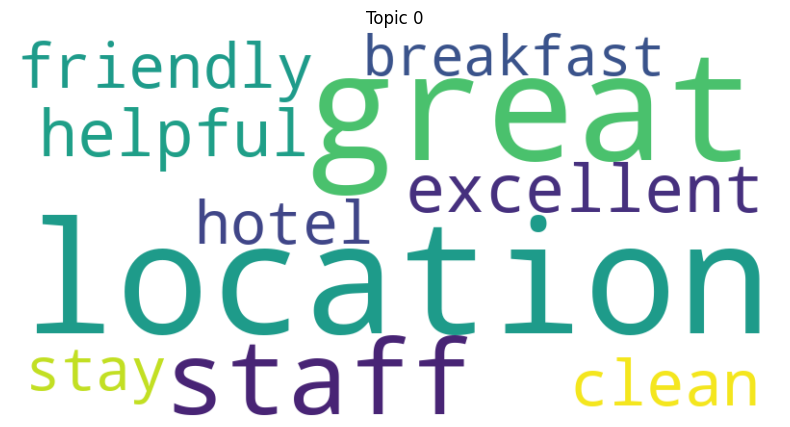

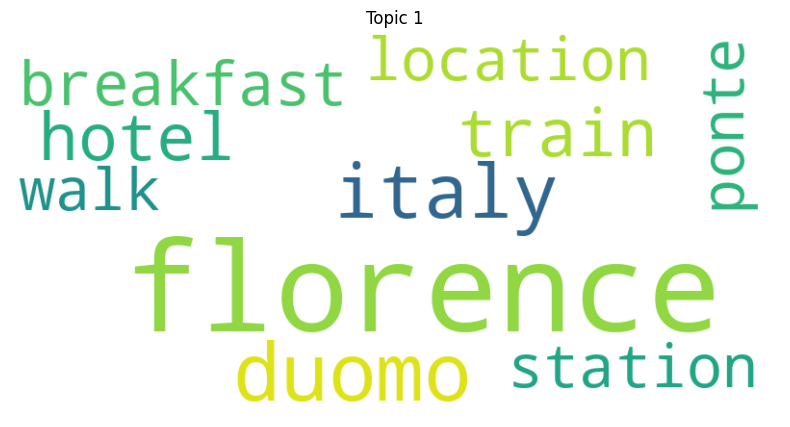

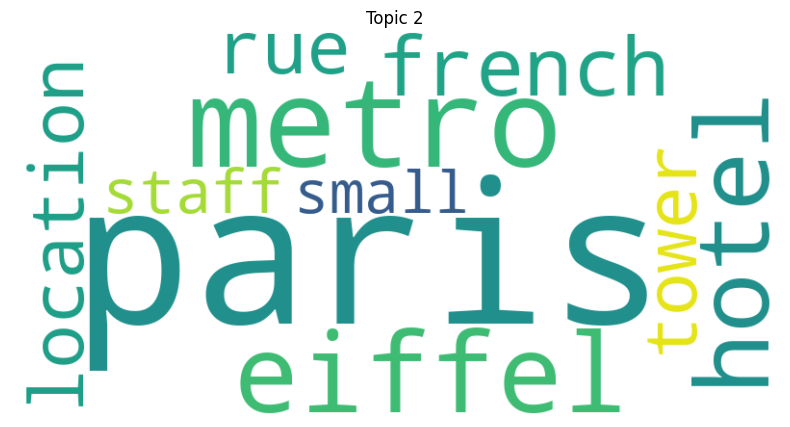

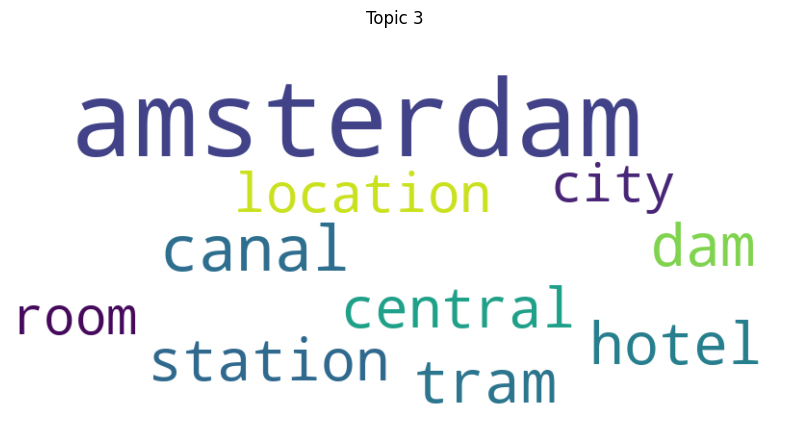

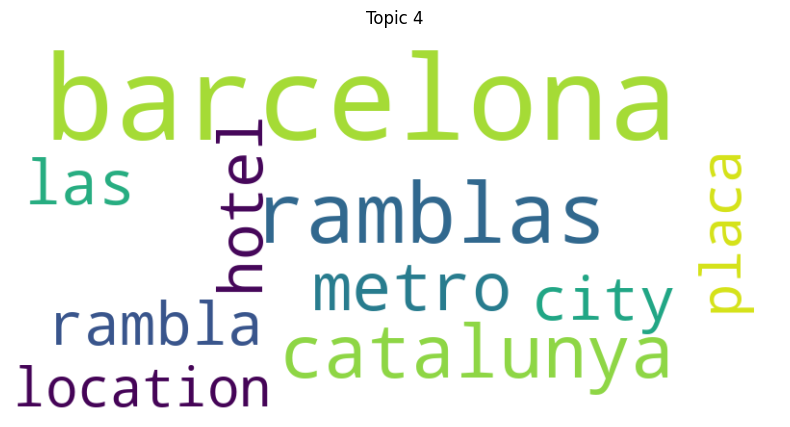

In [84]:

def wordcloud_bert_topic(topic, topic_num):
    topic_words = dict(topic)
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num}")
    plt.show()
for topic_num in range(5):
  topic = model.get_topic(topic_num)
  wordcloud_bert_topic(topic, topic_num)

## Для отзывов с низким рейтингом

In [99]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

stop_words = list(text.ENGLISH_STOP_WORDS)+['nt']
# для удаления стоп-слов
vectorizer_model = CountVectorizer(stop_words=stop_words)
model_1 = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, vectorizer_model=vectorizer_model)
headline_topics_1, _ = model_1.fit_transform(data_1.clean)

2024-08-31 16:02:51,416 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

2024-08-31 16:03:33,046 - BERTopic - Embedding - Completed ✓
2024-08-31 16:03:33,050 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 16:03:39,941 - BERTopic - Dimensionality - Completed ✓
2024-08-31 16:03:39,944 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 16:03:40,012 - BERTopic - Cluster - Completed ✓
2024-08-31 16:03:40,020 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 16:03:40,325 - BERTopic - Representation - Completed ✓


In [100]:
model_1.visualize_barchart(top_n_topics=5)

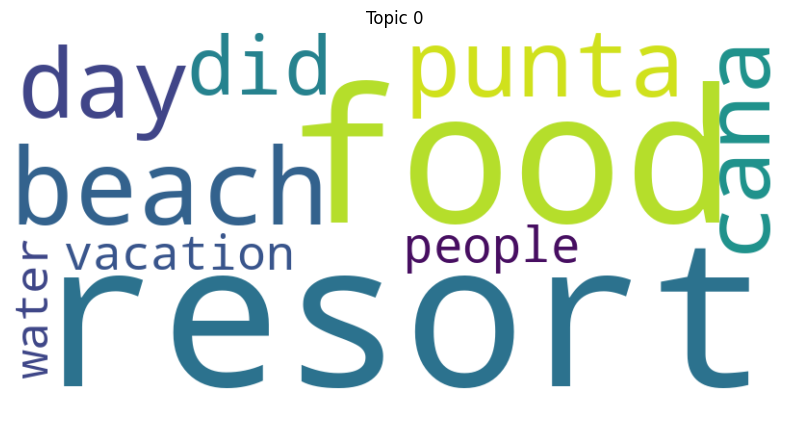

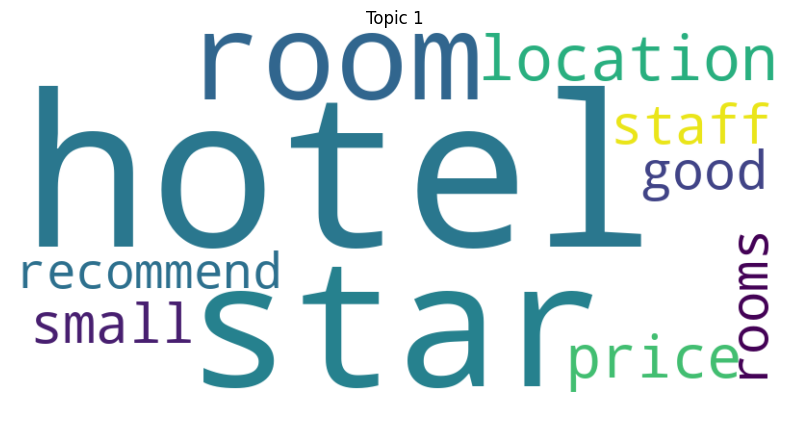

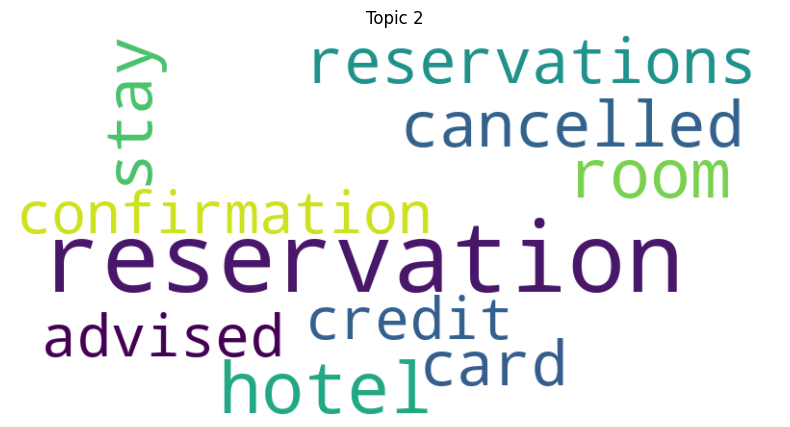

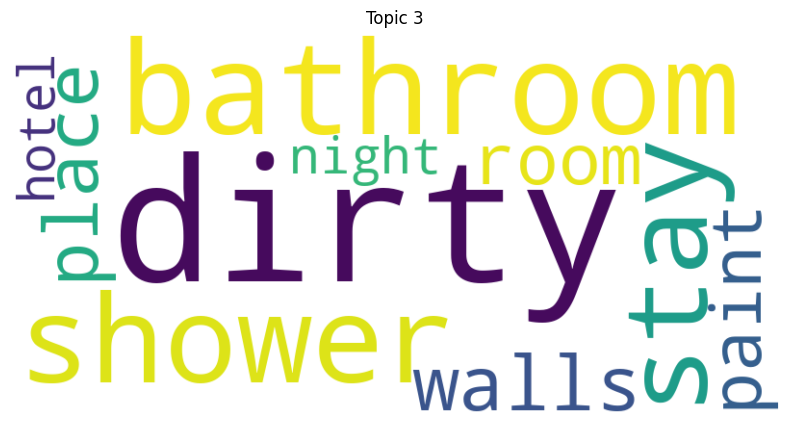

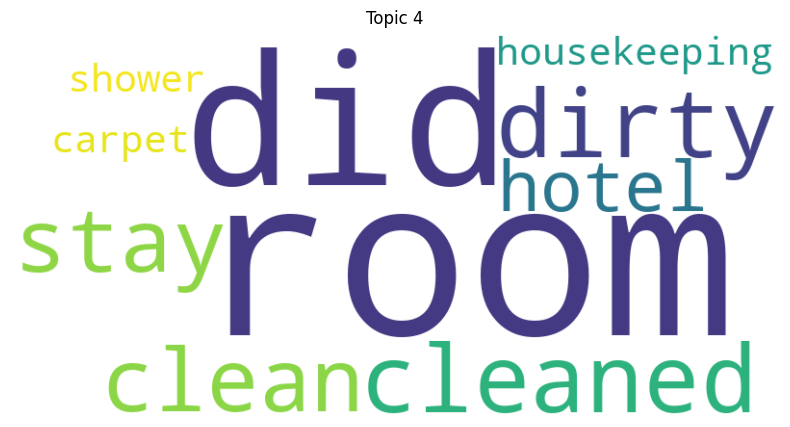

In [101]:
for topic_num in range(5):
  topic = model_1.get_topic(topic_num)
  wordcloud_bert_topic(topic, topic_num)

## Для отзывов с высоким рейтингом

In [89]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
# для удаления стоп-слов
vectorizer_model = CountVectorizer(stop_words="english")
model_5 = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, vectorizer_model=vectorizer_model)
headline_topics_5, _ = model_5.fit_transform(data_5.clean)

2024-08-31 15:34:27,566 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/283 [00:00<?, ?it/s]

2024-08-31 15:38:29,944 - BERTopic - Embedding - Completed ✓
2024-08-31 15:38:29,947 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 15:38:53,007 - BERTopic - Dimensionality - Completed ✓
2024-08-31 15:38:53,009 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 15:38:53,838 - BERTopic - Cluster - Completed ✓
2024-08-31 15:38:53,859 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 15:38:55,930 - BERTopic - Representation - Completed ✓


In [90]:
model_5.visualize_barchart(top_n_topics=5)

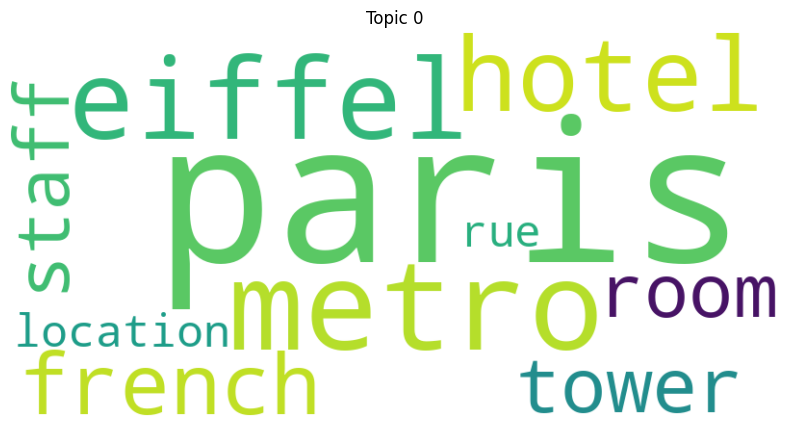

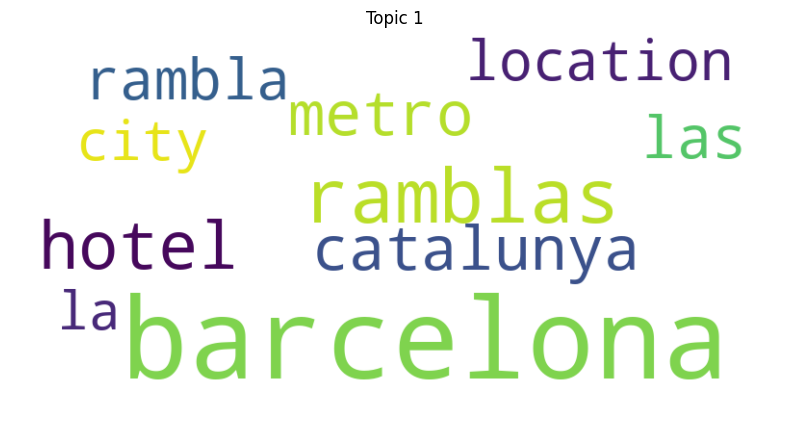

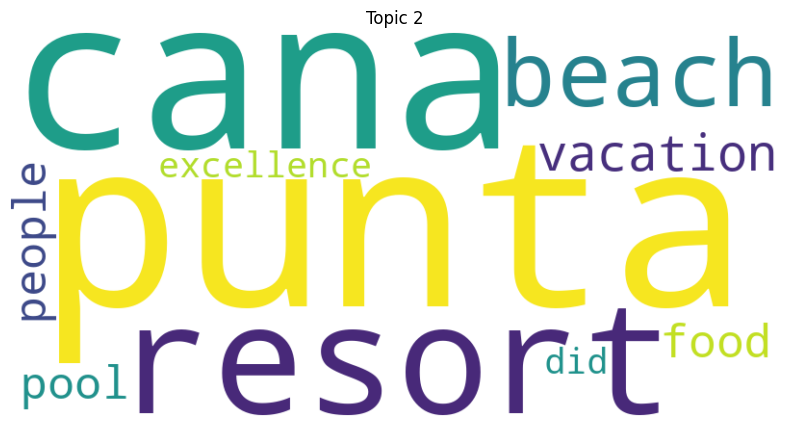

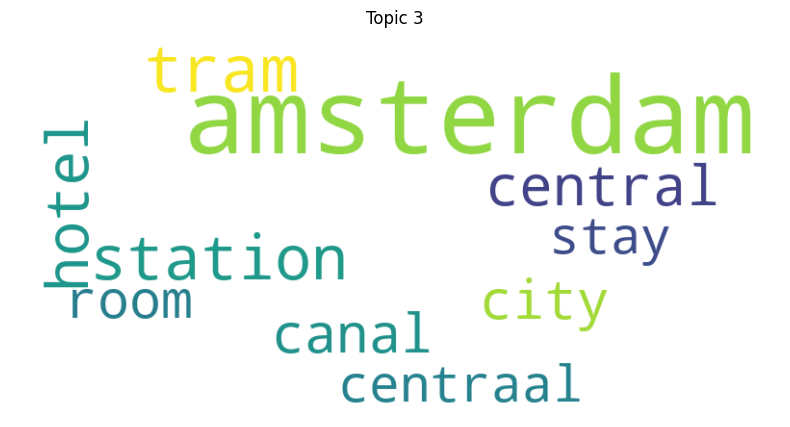

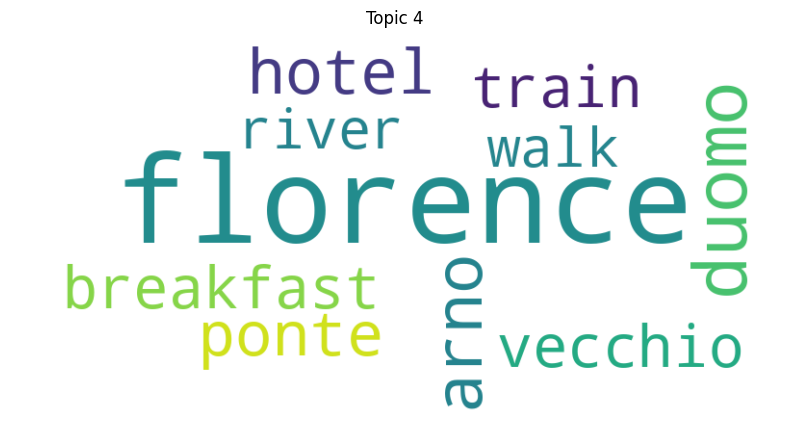

In [91]:
for topic_num in range(5):
  topic = model_5.get_topic(topic_num)
  wordcloud_bert_topic(topic, topic_num)

# Выводы:
* LDA вычисляется быстрее, чем LSA. Самый долгий BERTpoic.
* BERTpoic в топе выдал темы с конкретными городами мира.
* Темы для отзывов с низким рейтингом и с высоким рейтингом отличаются.
